# Import Packages and Data
**File name:** portfolio.json

Description: Offers sent during 30-day test period (10 offers x 6 fields)
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import data
portfolio = pd.read_json(r'data\01_raw\portfolio.json', lines=True)
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


# Clean up the dataframe

In [52]:
# Rename the 'id' column to 'offer_id'
portfolio = portfolio.rename(columns={'id': 'offer_id'})

#Rename 'duration' to 'duration_days' 
portfolio = portfolio.rename(columns={'duration': 'duration_days'})

#Convert duration_days to hours
portfolio['duration_hrs'] = (portfolio['duration_days'] * 24).astype(int)

#Make offer_id the first column
portfolio = portfolio[['offer_id', 'offer_type', 'difficulty', 'reward', 'duration_days', 'duration_hrs', 'channels']]

#Export the cleaned data to .csv
portfolio.to_csv(r'data\02_stg\stg_portfolio.csv', index=False)

#Pickle the cleaned data
portfolio.to_pickle(r'data\02_stg\stg_portfolio.pkl')

portfolio.head()

,offer_id,offer_type,difficulty,reward,duration_days,duration_hrs,channels
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,168,"[email, mobile, social]"
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,120,"[web, email, mobile, social]"
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,96,"[web, email, mobile]"
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,168,"[web, email, mobile]"
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,240,"[web, email]"


# Featurize the 'channels' column

In [53]:
# Convert 'channels' column into a string of space-separated strings
portfolio['channels'] = portfolio['channels'].apply(lambda x: ' '.join(x))

# Convert 'channels' column into separate binary columns
channels_profile = portfolio['channels'].str.get_dummies(' ')

# Concatenate the original DataFrame with the new 'channels' DataFrame
portfolio = pd.concat([portfolio, channels_profile], axis=1)

# Drop the original 'channels' column
portfolio = portfolio.drop('channels', axis=1)
    
portfolio.head()

,offer_id,offer_type,difficulty,reward,duration_days,duration_hrs,email,mobile,social,web
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,168,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,120,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,96,1,1,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,168,1,1,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,240,1,0,0,1


# Summary

In [54]:
#Count of offer_ids and offer types
num_offers = portfolio['offer_id'].nunique()
offer_types = portfolio['offer_type'].nunique()

#Create a string of offer types
offer_type_list = ', '.join(portfolio['offer_type'].unique())

print(f"The dataset contains {num_offers} unique offers that consists of {offer_types} different offer types: {offer_type_list}.")

print("The offers were sent through email, mobile, social and web channels.")

#Get min and max difficulty, reward, and duration
summary = portfolio[['difficulty', 'reward', 'duration_days']].describe().loc[['min', 'max']]

print(f"Customers were prompted to spend from {summary.loc['min', 'difficulty']} to {summary.loc['max', 'difficulty']} dollars with the rewards ranging from {summary.loc['min', 'reward']} to {summary.loc['max', 'reward']} dollars")

print(f"The offers were open for {summary.loc['min', 'duration_days']} to {summary.loc['max', 'duration_days']} days.")

The dataset contains 10 unique offers that consists of 3 different offer types: bogo, informational, discount.
The offers were sent through email, mobile, social and web channels.
Customers were prompted to spend from 0.0 to 20.0 dollars with the rewards ranging from 0.0 to 10.0 dollars
The offers were open for 3.0 to 10.0 days.


# Featurize offer types

In [55]:
# Convert the offer_type column into separate binary columns
offer_type_profile = pd.get_dummies(portfolio['offer_type'], prefix='is')

# Convert True/False values to 1/0
offer_type_profile = offer_type_profile.astype(int)

# Concatenate the original DataFrame with the new 'offer_type' DataFrame
portfolio = pd.concat([portfolio, offer_type_profile], axis=1)

# Drop the original 'offer_type' column
portfolio = portfolio.drop('offer_type', axis=1)

#Export the cleaned data to .csv
portfolio.to_csv(r'data\02_stg\stg_portfolio_featurized.csv', index=False)

#Pickle the cleaned data
portfolio.to_pickle(r'data\02_stg\stg_portfolio_featurized.pkl')

portfolio.head()

,offer_id,difficulty,reward,duration_days,duration_hrs,email,mobile,social,web,is_bogo,is_discount,is_informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,10,7,168,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,10,5,120,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,0,4,96,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,5,7,168,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,5,10,240,1,0,0,1,0,1,0


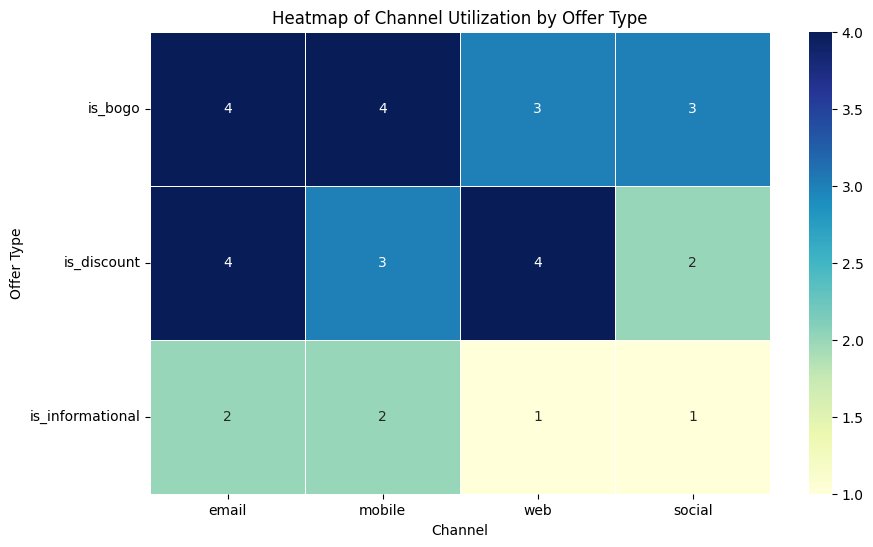

In [58]:
# Create a new DataFrame to summarize the channel utilization by offer type
channel_utilization = portfolio[['is_bogo', 'is_discount', 'is_informational', 'email', 'mobile', 'social', 'web']]

# Group by offer type and sum the channels, then reset index
channel_utilization_summary = channel_utilization.groupby(['is_bogo', 'is_discount', 'is_informational']).sum().reset_index()

# Map offer type columns to a single 'offer_type' column for easier plotting
channel_utilization_summary['offer_type'] = channel_utilization_summary[['is_bogo', 'is_discount', 'is_informational']].idxmax(axis=1)

# Drop the offer type indicator columns
channel_utilization_summary.drop(columns=['is_bogo', 'is_discount', 'is_informational'], inplace=True)

# Set 'offer_type' as the index
channel_utilization_summary.set_index('offer_type', inplace=True)

# Sum the rows and columns, sort them in descending order, and reorder the DataFrame based on these sums
row_sums = channel_utilization_summary.sum(axis=1).sort_values(ascending=False)
col_sums = channel_utilization_summary.sum(axis=0).sort_values(ascending=False)
channel_utilization_summary = channel_utilization_summary.loc[row_sums.index, col_sums.index]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(channel_utilization_summary, annot=True, cmap='YlGnBu', fmt='d', linewidths=.5)

plt.title('Heatmap of Channel Utilization by Offer Type')
plt.xlabel('Channel')
plt.ylabel('Offer Type')

# Rotate y-axis labels
plt.yticks(rotation=0)

plt.show()